## Business Understanding

In this project, I will use behaviour data from a multi-category eCommerce store taken from Kaggle, perform Exploratory Data Analysis to answer below business questions.

    1) What is the daily traffic in Oct?
    2) What product category and brands are more popular in viewing and purchasing?
    3) Customer Purchase behaviour (such as number of customers just viewing products or number of customers adding products to their shopping cart and number of customer who actually buy the product)?
    4) Amount spent by customers who purchased the products?

In [1]:
#importing required packages to perform the EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from datetime import datetime

%matplotlib inline

## Understand the Dataset

Read the dataset(CSV file) and check what data it contains.

In [2]:
data = pd.read_csv("2019-Oct.csv")
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [3]:
data.shape

(42448764, 9)

In [4]:
data.info()

# a keen point to notice is that event_time is of type object instead of datetime. Hence while cleaning data we need to make
# sure that it is converted to correct type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


In [5]:
data.describe()

,product_id,category_id,price,user_id
count,4.244876e+07,4.244876e+07,4.244876e+07,4.244876e+07
mean,1.054993e+07,2.057404e+18,2.903237e+02,5.335371e+08
std,1.188191e+07,1.843926e+16,3.582692e+02,1.852374e+07
min,1.000978e+06,2.053014e+18,0.000000e+00,3.386938e+07
25%,1.005157e+06,2.053014e+18,6.598000e+01,5.159043e+08
50%,5.000470e+06,2.053014e+18,1.629300e+02,5.296965e+08
75%,1.600030e+07,2.053014e+18,3.585700e+02,5.515788e+08
max,6.050001e+07,2.175420e+18,2.574070e+03,5.662809e+08


## Data Cleaning

I will check if there are any NaN, duplicates or wrong formatted data and remove them from original dataset

In [6]:
# Check if null values are present in each column
data.isnull().any(axis = 0)

event_time       False
event_type       False
product_id       False
category_id      False
category_code     True
brand             True
price            False
user_id          False
user_session      True
dtype: bool

In [7]:
#Drop the rows which contain null values and make changes to original dataset
data.dropna(how='any',inplace = True)
data.isnull().any(axis = 0)

event_time       False
event_type       False
product_id       False
category_id      False
category_code    False
brand            False
price            False
user_id          False
user_session     False
dtype: bool

In [8]:
# Drop unecessary columns to reduce memory consumption of dataset
data.drop(['category_id', 'user_session'], axis=1, inplace= True)

In [9]:
data.info() #new info of cleaned dataset, memory reduced to 1.6+ GB from 2.8+ GB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26560620 entries, 1 to 42448762
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_code  object 
 4   brand          object 
 5   price          float64
 6   user_id        int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ GB


In [10]:
'''converts utc date time string to datetime object in format YYYY-mm-dd 
    
    Parameters: date_time_utc(str): utc date time string to be converted
    
    Returns: date_utc(datatime): utc date in datatime format to be returned
    '''
def conv_date_time(date_time_utc):
    date_utc = datetime.strptime(date_time_utc[0:10], '%Y-%m-%d').date()
    #time_utc = datetime.strptime(date_time_utc[11:19], '%I-%M-%S').time()
    return date_utc

## Number of Unique customers
How many customers visited the site in the month of Oct,2019?

In [11]:
total_visitors = data['user_id'].nunique()
print(f"Total number of visitors in Oct,2019: {total_visitors}")

Total number of visitors in Oct,2019: 2323036


## Visitor's Trend on a Daily basis

In [12]:
#Aggregating data based on event_date and number of customers visiting the site on daily basis

data['event_date'] = data['event_time'].apply(lambda strn: conv_date_time(strn))
visitors_per_day = data[['event_date','user_id']].drop_duplicates().groupby(['event_date'])['user_id'].agg(['count']).sort_values(by = ['event_date'],ascending=True)

**Plotting Visitor's Trend per day**

We could observe that number of customers has an increasing trend from 13th Oct 2019 to 21st Oct 2019, which signifies that there was a sale in the eCommerce store during that period. 

The sudden fall of visitor's for the site on 18th Oct 2019 might be due to the required items being sold out.

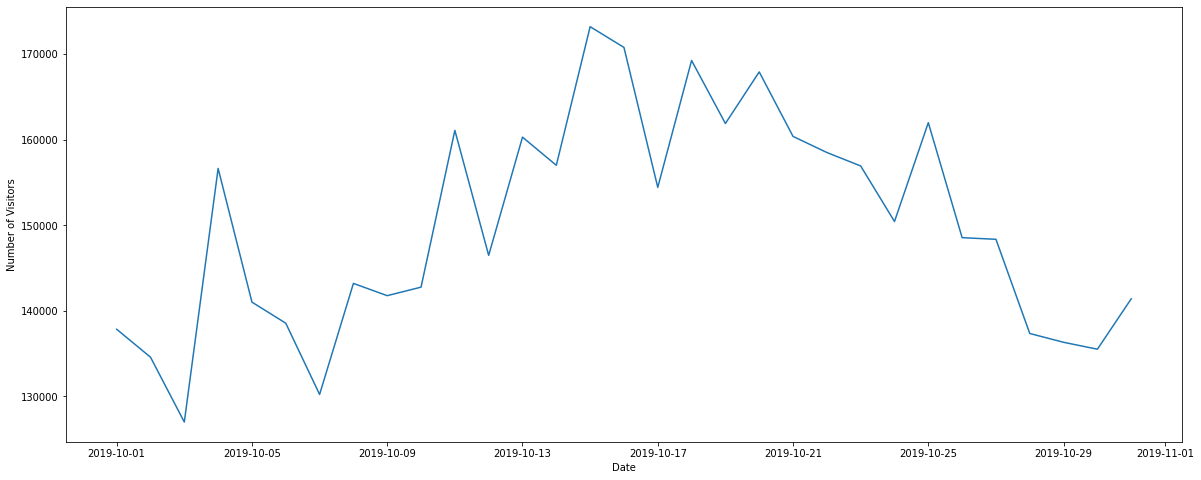

In [14]:
x_value = pd.Series(visitors_per_day.index.values)
y_value = visitors_per_day['count']
plt.rcParams["figure.figsize"] = (20,8)

plt.plot(x_value,y_value)
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.show()

In [15]:
data_event_type = data[['category_code','event_type']].groupby(['category_code','event_type']).size().reset_index(name='total')
data_event_type

,category_code,event_type,total
0,accessories.bag,cart,527
1,accessories.bag,purchase,1100
2,accessories.bag,view,160402
3,accessories.umbrella,cart,5
4,accessories.umbrella,purchase,24
...,...,...,...
330,sport.trainer,purchase,211
331,sport.trainer,view,20520
332,stationery.cartrige,cart,75
333,stationery.cartrige,purchase,115


In [16]:
# Segregating customers based on even_type(view, cart and purchase)

only_purchases = data_event_type.loc[data_event_type.event_type == 'purchase'].sort_values(by = 'total',ascending = False)
only_cart = data_event_type.loc[data_event_type.event_type == 'cart'].sort_values(by = 'total',ascending = False)
only_view = data_event_type.loc[data_event_type.event_type == 'view'].sort_values(by = 'total',ascending = False)

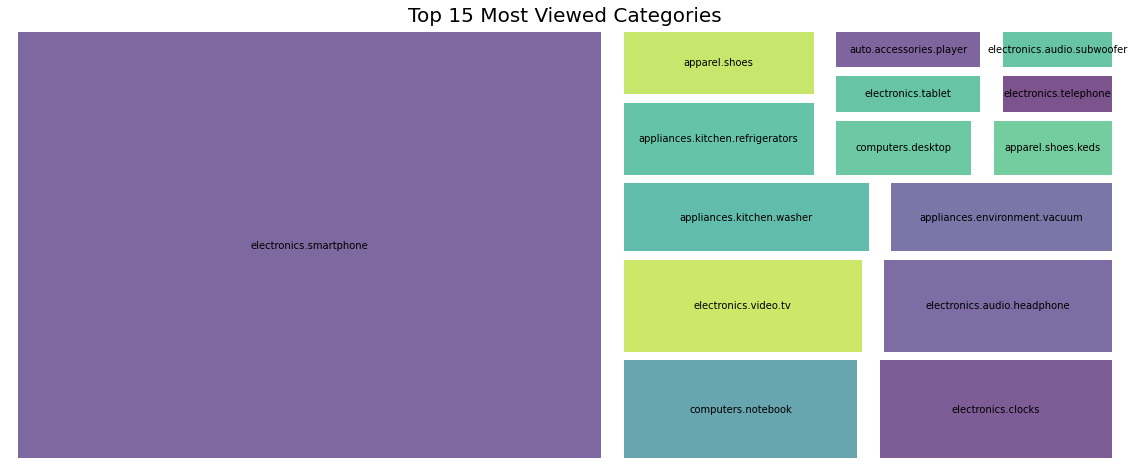

In [17]:
#Plots Top 15 most viewed category based on sizes

squarify.plot(sizes= only_view.total[:15], label=only_view.category_code, pad = True, alpha=.7)
plt.axis('off')

plt.title('Top 15 Most Viewed Categories',fontdict={'fontsize': 20})
plt.show()

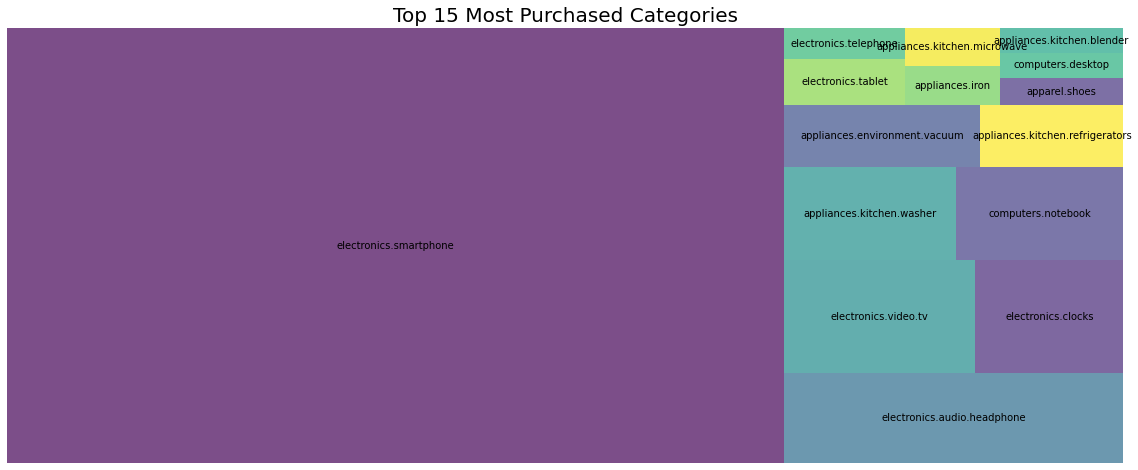

In [18]:
#Plots Top 15 most purchased category based on sizes

squarify.plot(sizes= only_purchases.total[:15], label=only_purchases.category_code, alpha=.7)
plt.axis('off')

plt.title('Top 15 Most Purchased Categories',fontdict={'fontsize': 20})
plt.show()

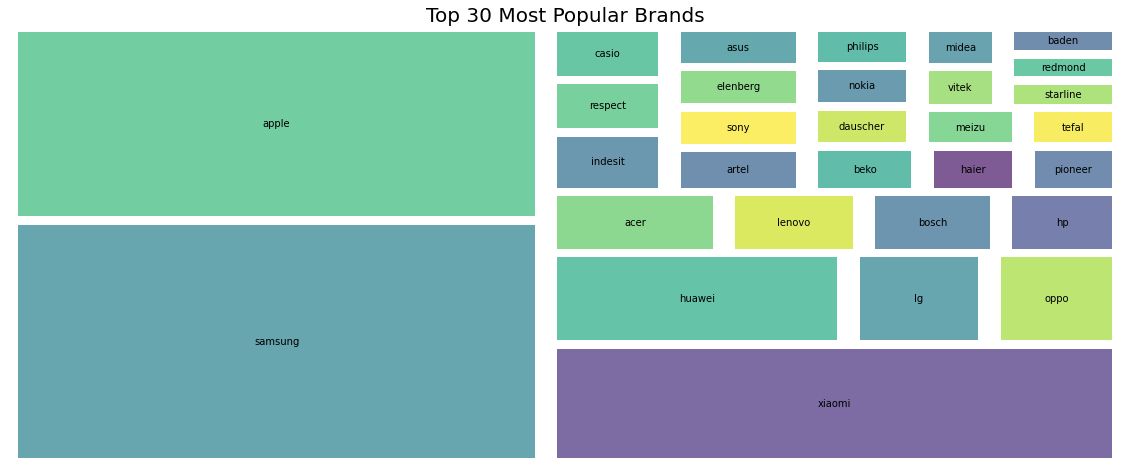

In [19]:
#Popular Brands customers look into

top_brand_n = 30
top_brand = data['brand'].value_counts()[:top_brand_n].sort_values(ascending=False)
df = pd.DataFrame({'count':top_brand, 'top_category':top_brand.index.array })

squarify.plot(sizes=top_brand, label=top_brand.index.array,pad = True, alpha=.7)
plt.axis('off')
plt.title('Top 30 Most Popular Brands', fontdict={'fontsize': 20})
plt.show()

## Purchase Behavior of Customers
How is the distribution of event_type?

It is self explanatory, as 95% of the customers logged onto the website just to view the products. Very few of them actually purchased the products.

In [20]:
data['event_type'].value_counts()

view        25201706
cart          809407
purchase      549507
Name: event_type, dtype: int64

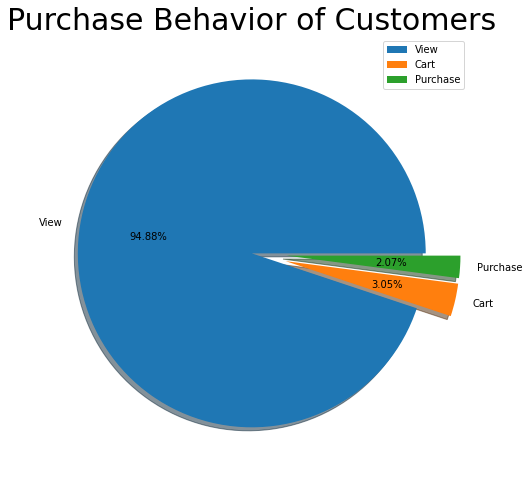

In [21]:
labels = ['View', 'Cart', 'Purchase']
size = data['event_type'].value_counts()
explode = [0, 0.2,0.2]

plt.figure(figsize=(8,8))
plt.pie(size, explode = explode, labels = labels, shadow=True, autopct = '%.2f%%')
plt.title('Purchase Behavior of Customers',fontdict={'fontsize': 30})
plt.legend()
plt.show()

**What brands do customers purchase?**

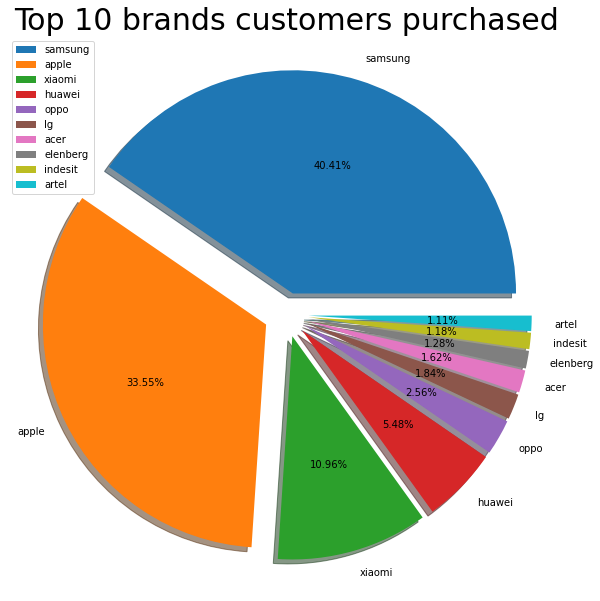

In [22]:
purchase = data.loc[data['event_type'] == 'purchase']
top_selling_brands = purchase.groupby(['brand']).size().sort_values(ascending = False).to_frame('Total')

labels = top_selling_brands.index.values[:10]
size = top_selling_brands['Total'][:10]
explode = [0.1] *10
plt.figure(figsize=(10,11))
plt.pie(size, explode = explode, labels = labels, shadow=True, autopct = '%.2f%%')
plt.title('Top 10 brands customers purchased',fontdict={'fontsize': 30})
plt.legend()
plt.show()

## Amount Spent by Customers on eCommerce website

We could see from the bar graph that amount spent by customers from 13th Oct 2019 to 19th Oct 2019 is high. Previously, we got to know from the line graph that views of the website during the same time was high and made an assumption it might be because of a sale. This bar graph confirms it, as the amount spent during the same dates were the highest.

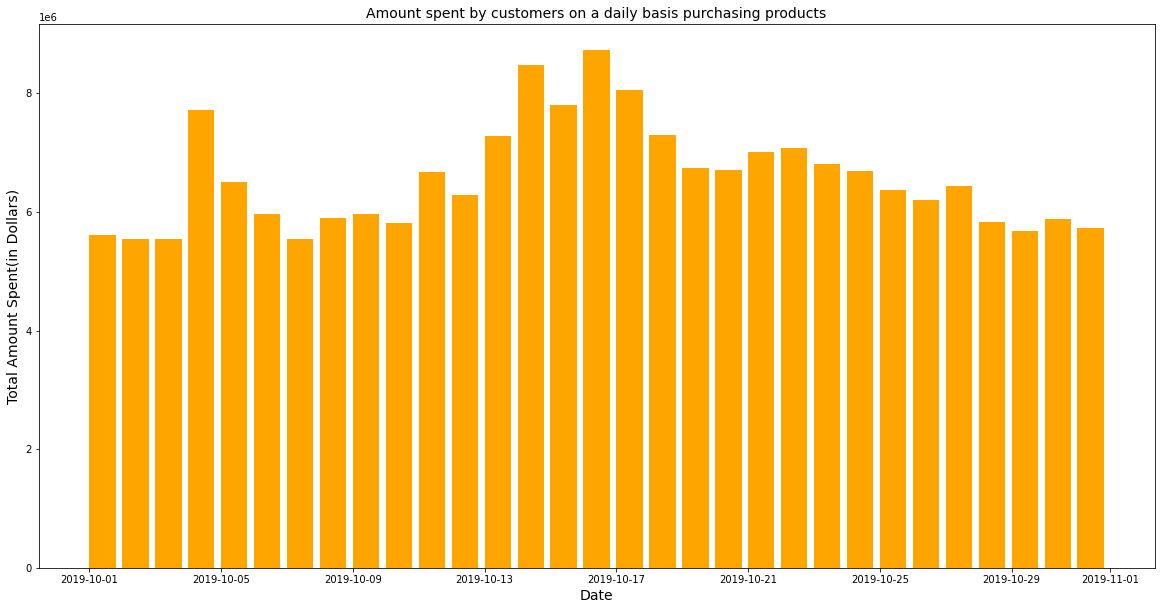

In [37]:
# Total Amount spent by customers on a daily basis, purchasing products

purchase_data = purchase[['event_date','price']].groupby(['event_date']).agg('sum')

plt.figure(figsize=(20,10))

plt.bar(purchase_data.index.values,purchase_data['price'], color = 'orange',align='edge')
plt.title('Amount spent by customers on a daily basis purchasing products', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Amount Spent(in Dollars)', fontsize=14)
plt.show()